In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from random import randint, seed
from IPython.display import display
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


# Import du dataset

In [59]:
path = 'maladie_cardiaque2.csv'
maladie = pd.read_csv(path,sep=',',header=0, index_col=1)
maladie = maladie.drop(columns=['Unnamed: 0'])
maladie.head(5)
 

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393  homme     168   62.0             110               80      normal   
1   20228  femme     156   85.0             140               90  tres eleve   
2   18857  femme     165   64.0             130               70  tres eleve   
3   17623  homme     169   82.0             150              100      normal   
4   17474  femme     156   56.0             100               60      normal   

    glycemie      fumeur conso_alco  activite_physique malade  
id                                                             
0          1  non fumeur        non                  1    non  
1          1  non fumeur        non                  1    oui  
2          1  non fumeur        non                  0    oui  
3          1  non fumeur        non                  1    oui  
4          1  non fumeur        non                  0    non

# Analyse superficielle du dataset

In [60]:
from data_analyzer import analyse

resultat = analyse(maladie)
display(resultat)

(70000, 12)

Name   dtypes  Missing  Miss_Percent  Unique First Value  \
0                 age    int64        0           0.0    8076       18393   
1               genre   object        0           0.0       2       homme   
2              taille    int64        0           0.0     109         168   
3               Poids  float64        0           0.0     287        62.0   
4      pression_systo    int64        0           0.0     153         110   
5     pression_diasto    int64        0           0.0     157          80   
6         cholesterol   object        0           0.0       3      normal   
7            glycemie    int64        0           0.0       3           1   
8              fumeur   object        0           0.0       2  non fumeur   
9          conso_alco   object        0           0.0       2         non   
10  activite_physique    int64        0           0.0       2           1   
11             malade   object        0           0.0       2         non   

   Second Value Third Value  
0         20228       18857  
1         femme       femme  
2           156         165  
3          85.0        64.0  
4           140         130  
5            90          70  
6    tres eleve  tres eleve  
7             1           1  
8    non fumeur  non fumeur  
9           non         non  
10            1           0  
11          oui         oui

In [61]:
maladie.describe()

age        taille         Poids  pression_systo  \
count  70000.000000  70000.000000  70000.000000    70000.000000   
mean   19468.865814    164.359229     74.205690      128.817286   
std     2467.251667      8.210126     14.395757      154.011419   
min    10798.000000     55.000000     10.000000     -150.000000   
25%    17664.000000    159.000000     65.000000      120.000000   
50%    19703.000000    165.000000     72.000000      120.000000   
75%    21327.000000    170.000000     82.000000      140.000000   
max    23713.000000    250.000000    200.000000    16020.000000   

       pression_diasto      glycemie  activite_physique  
count     70000.000000  70000.000000       70000.000000  
mean         96.630414      1.226457           0.803729  
std         188.472530      0.572270           0.397179  
min         -70.000000      1.000000           0.000000  
25%          80.000000      1.000000           1.000000  
50%          80.000000      1.000000           1.000000  
75%          90.000000      1.000000           1.000000  
max       11000.000000      3.000000           1.000000

# Data Prep

Création d'une colonne pour avoir l'âge en année

In [62]:
display(maladie["age"])

id
0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
99993    19240
99995    22601
99996    19066
99998    22431
99999    20540
Name: age, Length: 70000, dtype: int64

In [63]:
maladie["Age(year)"] = round((maladie["age"]/365),0)

Ajout d'une colonne avec l'IMC des individus

In [64]:
maladie["IMC"] = maladie['Poids']/((maladie['taille']/100)*(maladie['taille']/100))
maladie

age  genre  taille  Poids  pression_systo  pression_diasto  \
id                                                                    
0      18393  homme     168   62.0             110               80   
1      20228  femme     156   85.0             140               90   
2      18857  femme     165   64.0             130               70   
3      17623  homme     169   82.0             150              100   
4      17474  femme     156   56.0             100               60   
...      ...    ...     ...    ...             ...              ...   
99993  19240  homme     168   76.0             120               80   
99995  22601  femme     158  126.0             140               90   
99996  19066  homme     183  105.0             180               90   
99998  22431  femme     163   72.0             135               80   
99999  20540  femme     170   72.0             120               80   

      cholesterol  glycemie      fumeur conso_alco  activite_physique malade  \
id                                                                             
0          normal         1  non fumeur        non                  1    non   
1      tres eleve         1  non fumeur        non                  1    oui   
2      tres eleve         1  non fumeur        non                  0    oui   
3          normal         1  non fumeur        non                  1    oui   
4          normal         1  non fumeur        non                  0    non   
...           ...       ...         ...        ...                ...    ...   
99993      normal         1      fumeur        non                  1    non   
99995       eleve         2  non fumeur        non                  1    oui   
99996  tres eleve         1  non fumeur        oui                  0    oui   
99998      normal         2  non fumeur        non                  0    oui   
99999       eleve         1  non fumeur        non                  1    non   

       Age(year)        IMC  
id                           
0           50.0  21.967120  
1           55.0  34.927679  
2           52.0  23.507805  
3           48.0  28.710479  
4           48.0  23.011177  
...          ...        ...  
99993       53.0  26.927438  
99995       62.0  50.472681  
99996       52.0  31.353579  
99998       61.0  27.099251  
99999       56.0  24.913495  

[70000 rows x 14 columns]

Binarisation des données

In [65]:
label_encoder_sex = LabelEncoder()
label_encoder_bin = LabelEncoder()

# Encodage binaire des données catégorielles
maladie['genre'] = label_encoder_sex.fit_transform(maladie['genre'])
maladie['conso_alco'] = label_encoder_bin.fit_transform(maladie['conso_alco'])
maladie['fumeur'] = label_encoder_bin.fit_transform(maladie['fumeur'])
maladie['malade'] = label_encoder_bin.fit_transform(maladie['malade'])

In [66]:
# Code pour récupérer les données d'origines
# maladie['genre'] = label_encoder_sex.inverse_transform(maladie['genre'])
# display(maladie[['genre']])

In [67]:
print(label_encoder_sex.inverse_transform(maladie['genre']))
print(label_encoder_bin.inverse_transform(maladie['fumeur']))

['homme' 'femme' 'femme' ... 'homme' 'femme' 'femme']
['oui' 'oui' 'oui' ... 'oui' 'oui' 'oui']


Caractérisation de l'IMC

In [68]:
maladie.drop_duplicates(inplace=True)
labels = ['Sous-poids', 'Normal', 'Surpoids', 'Obèse']
maladie['IMC_Categorie'] = pd.cut(maladie['IMC'], bins=[0, 18.5, 25, 30, float('inf')], labels=labels, include_lowest=True)


Séparation des individus en tranche d'âge

In [69]:
bins = [0, 18, 35, 50, 70, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-70', '70+']
maladie['Age_Categorie'] = pd.cut(maladie['Age(year)'], bins=bins, labels=labels, include_lowest=True)

In [70]:
maladie['Ratio_Poids_Taille'] = maladie['Poids'] / (maladie['taille'] / 100)

In [71]:
conditions = [
    (maladie['pression_systo'] < 90) & (maladie['pression_diasto'] < 60),  # Hypotension
    (maladie['pression_systo'] >= 90) & (maladie['pression_systo'] < 115) & (maladie['pression_diasto'] < 75),  # Hypotension légère
    (maladie['pression_systo'] >= 115) & (maladie['pression_systo'] < 120) & (maladie['pression_diasto'] < 80),  # Normale
    (maladie['pression_systo'] >= 120) & (maladie['pression_systo'] < 140) & (maladie['pression_diasto'] < 90),  # Hypertension légère
    (maladie['pression_systo'] >= 140) | (maladie['pression_diasto'] >= 90)  # Hypertension
]
labels = ['Hypotension', 'Hypotension Légère', 'Normale', 'Hypertension Légère', 'Hypertension']
maladie['Pression_Arterielle_Categorie'] = np.select(conditions, labels, default='Inconnu')

In [72]:
maladie.head()

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393      1     168   62.0             110               80      normal   
1   20228      0     156   85.0             140               90  tres eleve   
2   18857      0     165   64.0             130               70  tres eleve   
3   17623      1     169   82.0             150              100      normal   
4   17474      0     156   56.0             100               60      normal   

    glycemie  fumeur  conso_alco  activite_physique  malade  Age(year)  \
id                                                                       
0          1       1           0                  1       0       50.0   
1          1       1           0                  1       1       55.0   
2          1       1           0                  0       1       52.0   
3          1       1           0                  1       1       48.0   
4          1       1           0                  0       0       48.0   

          IMC IMC_Categorie Age_Categorie  Ratio_Poids_Taille  \
id                                                              
0   21.967120        Normal         36-50           36.904762   
1   34.927679         Obèse         51-70           54.487179   
2   23.507805        Normal         51-70           38.787879   
3   28.710479      Surpoids         36-50           48.520710   
4   23.011177        Normal         36-50           35.897436   

   Pression_Arterielle_Categorie  
id                                
0                        Inconnu  
1                   Hypertension  
2            Hypertension Légère  
3                   Hypertension  
4             Hypotension Légère

Détéctions des outliners

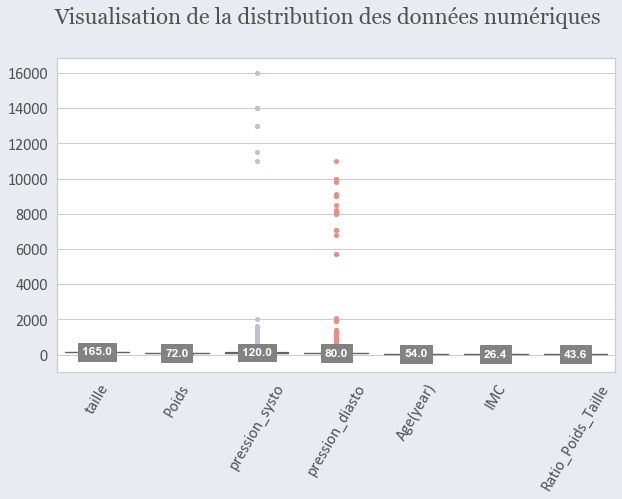

In [73]:
# Boxplot des outliners

var_num = ['taille', 'Poids', 'pression_systo', 'pression_diasto', "Age(year)", 'IMC', "Ratio_Poids_Taille"]
maladie[var_num] = maladie[var_num].apply(pd.to_numeric, errors='coerce', axis=1)

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

x = sns.boxplot(data=maladie,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       order=['taille', 'Poids', 'pression_systo', 'pression_diasto', "Age(year)",'IMC', "Ratio_Poids_Taille"],
                       flierprops=dict(marker='o', markersize=4))

font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

title = 'Visualisation de la distribution des données numériques'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
plt.subplots_adjust(top=0.85)

for i, box in enumerate(ax.artists):
         col = box.get_facecolor()
         plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1)
    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='semibold',
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.show()

In [74]:
maladie["IMC"].mean()

27.557610036546464

Suppression des outliners

In [75]:
out_filter = ((maladie["pression_systo"]>250) | (maladie["pression_diasto"]>200))
maladie = maladie[~out_filter]
out_filter2 = ((maladie["pression_systo"] < 0) | (maladie["pression_diasto"] < 0))
maladie = maladie[~out_filter2]
out_filter3 = ((maladie["taille"] > 200))
maladie = maladie[~out_filter3]
out_filter4 = ((maladie["IMC"] > 200))
maladie = maladie[~out_filter4]

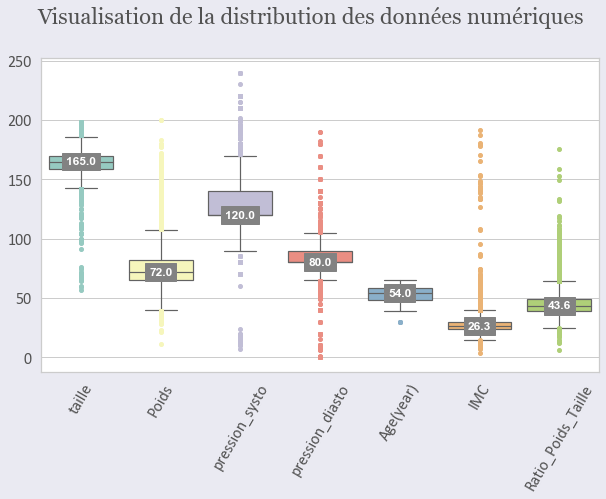

In [76]:
# Boxplot des outliners

var_num = ['taille', 'Poids', 'pression_systo', 'pression_diasto', "Age(year)", 'IMC', "Ratio_Poids_Taille"]
maladie[var_num] = maladie[var_num].apply(pd.to_numeric, errors='coerce', axis=1)

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

x = sns.boxplot(data=maladie,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       order=['taille', 'Poids', 'pression_systo', 'pression_diasto', "Age(year)",'IMC', "Ratio_Poids_Taille"],
                       flierprops=dict(marker='o', markersize=4))

font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

title = 'Visualisation de la distribution des données numériques'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
plt.subplots_adjust(top=0.85)

for i, box in enumerate(ax.artists):
         col = box.get_facecolor()
         plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1)
    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='semibold',
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.show()

In [77]:
maladie.shape

(68969, 18)

In [78]:
maladie.head()

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393      1   168.0   62.0           110.0             80.0      normal   
1   20228      0   156.0   85.0           140.0             90.0  tres eleve   
2   18857      0   165.0   64.0           130.0             70.0  tres eleve   
3   17623      1   169.0   82.0           150.0            100.0      normal   
4   17474      0   156.0   56.0           100.0             60.0      normal   

    glycemie  fumeur  conso_alco  activite_physique  malade  Age(year)  \
id                                                                       
0          1       1           0                  1       0       50.0   
1          1       1           0                  1       1       55.0   
2          1       1           0                  0       1       52.0   
3          1       1           0                  1       1       48.0   
4          1       1           0                  0       0       48.0   

          IMC IMC_Categorie Age_Categorie  Ratio_Poids_Taille  \
id                                                              
0   21.967120        Normal         36-50           36.904762   
1   34.927679         Obèse         51-70           54.487179   
2   23.507805        Normal         51-70           38.787879   
3   28.710479      Surpoids         36-50           48.520710   
4   23.011177        Normal         36-50           35.897436   

   Pression_Arterielle_Categorie  
id                                
0                        Inconnu  
1                   Hypertension  
2            Hypertension Légère  
3                   Hypertension  
4             Hypotension Légère

# DataViz

Distribution des maladies cardiaques ou non

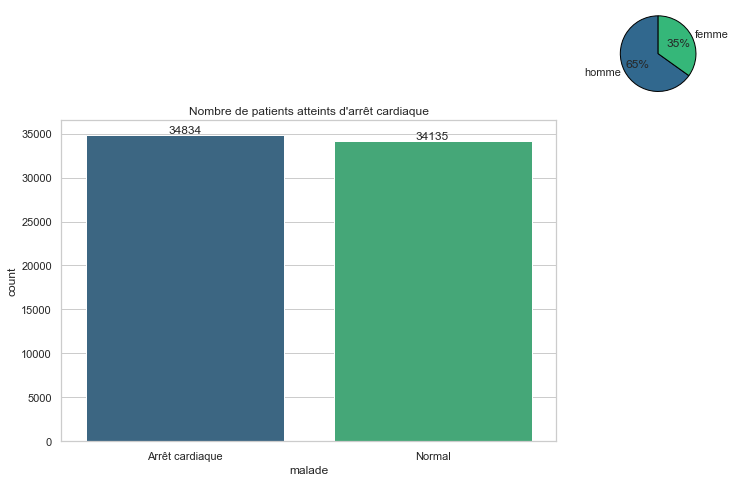

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
gs = plt.GridSpec(4, 4)

# Tracé du graphique principal (histogramme)
ax2 = plt.subplot(gs[1:, :-1])
palette = sns.color_palette("viridis", 2)
sns.countplot(x='malade', data=maladie, ax=ax2, palette=palette)
for i, j in enumerate(maladie['malade'].value_counts().values):
    ax2.text(i, j, str(j), ha='center', va='bottom', fontsize=12)
ax2.set(title="Nombre de patients atteints d'arrêt cardiaque")
ax2.set_xticklabels(["Arrêt cardiaque", "Normal"])

# Tracé du diagramme circulaire (en petit)
ax1 = plt.subplot(gs[0, -1])

gender_labels = label_encoder_sex.inverse_transform(maladie['genre'].unique())
ax1.pie(maladie['genre'].value_counts(), labels=gender_labels, autopct="%1.0f%%", startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.show()


Distribution de l'âge

In [80]:
import plotly.express as px

# Création de l'histogramme
fig = px.histogram(maladie, x="Age(year)", nbins=30, title="Distribution de l'âge")

# Ajustements esthétiques
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1, opacity=0.7)

# Ajustements de la mise en page
fig.update_layout(xaxis_title="Âge (années)", yaxis_title="Nombre", showlegend=False,
                  bargap=0.05, plot_bgcolor='rgba(0,0,0,0)', margin=dict(l=50, r=50, t=50, b=50))

# Affichage du graphique
fig.show()


ModuleNotFoundError: No module named 'plotly'

Répartition par genre

In [ ]:
maladie.head()

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393      1   168.0   62.0           110.0             80.0      normal   
1   20228      0   156.0   85.0           140.0             90.0  tres eleve   
2   18857      0   165.0   64.0           130.0             70.0  tres eleve   
3   17623      1   169.0   82.0           150.0            100.0      normal   
4   17474      0   156.0   56.0           100.0             60.0      normal   

    glycemie  fumeur  conso_alco  activite_physique  malade  Age(year)  \
id                                                                       
0          1       1           0                  1       0       50.0   
1          1       1           0                  1       1       55.0   
2          1       1           0                  0       1       52.0   
3          1       1           0                  1       1       48.0   
4          1       1           0                  0       0       48.0   

          IMC IMC_Categorie Age_Categorie  Ratio_Poids_Taille  \
id                                                              
0   21.967120        Normal         36-50           36.904762   
1   34.927679         Obèse         51-70           54.487179   
2   23.507805        Normal         51-70           38.787879   
3   28.710479      Surpoids         36-50           48.520710   
4   23.011177        Normal         36-50           35.897436   

   Pression_Arterielle_Categorie  
id                                
0                   Hypertension  
1                   Hypertension  
2                   Hypertension  
3                   Hypertension  
4                        Normale

In [ ]:
print(label_encoder_bin.inverse_transform(maladie['activite_physique']))

['oui' 'oui' 'non' ... 'non' 'non' 'oui']


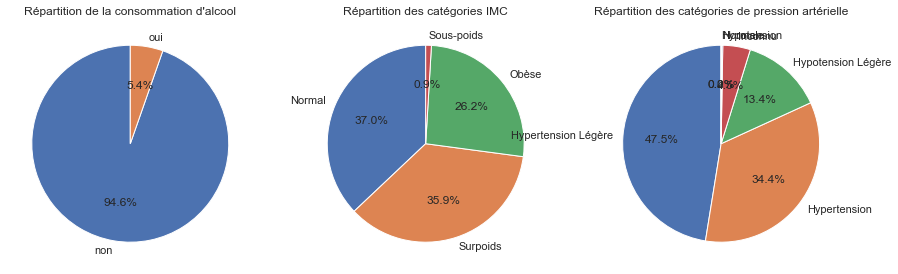

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez déjà chargé vos données dans un DataFrame nommé maladie

# Comptage des occurrences pour chaque catégorie
conso_alco_counts = maladie['conso_alco'].value_counts()
IMC_counts = maladie['IMC_Categorie'].value_counts()
pression_arterielle_counts = maladie['Pression_Arterielle_Categorie'].value_counts()

# Création d'une figure avec trois sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graphique pour la répartition de ceux qui consomment de l'alcool ou non
axes[0].pie(conso_alco_counts, labels=label_encoder_bin.inverse_transform(maladie['conso_alco'].unique()), autopct='%1.1f%%', startangle=90)
axes[0].set_title('Répartition de la consommation d\'alcool')

# Graphique pour la répartition des catégories IMC
axes[1].pie(IMC_counts, labels=IMC_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition des catégories IMC')

# Graphique pour la répartition des catégories de pression artérielle
axes[2].pie(pression_arterielle_counts, labels=pression_arterielle_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Répartition des catégories de pression artérielle')

plt.show()

C:\Users\himme\AppData\Local\Temp\ipykernel_17344\3650593614.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



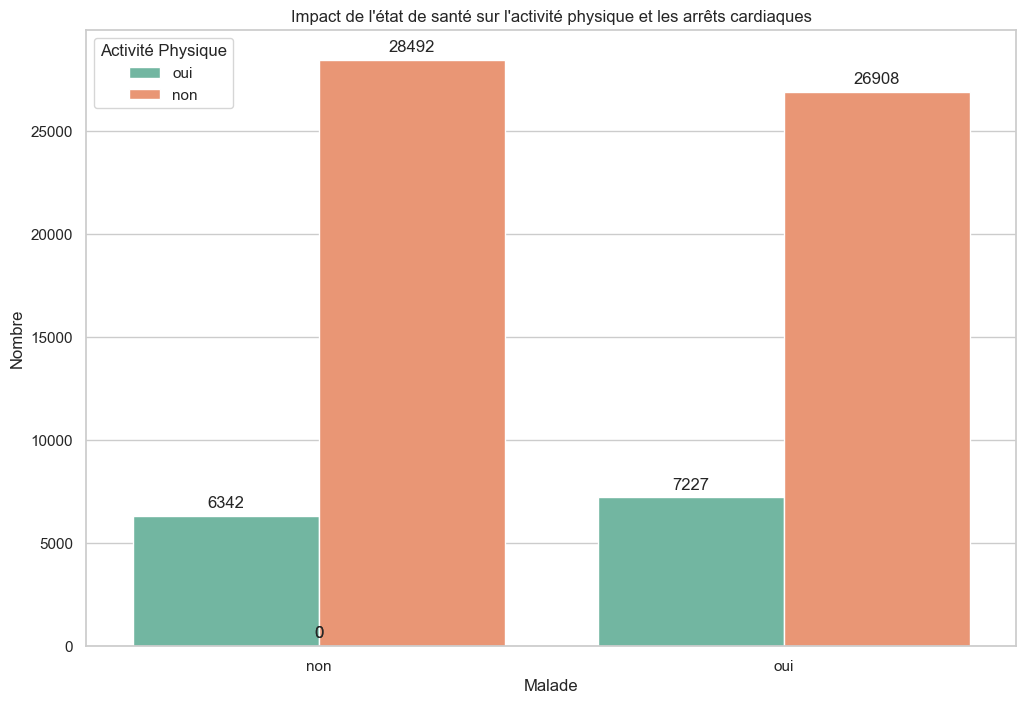

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
gs = plt.GridSpec(4, 4)

# Tracé du graphique principal (histogramme)
ax = sns.countplot(x='malade', hue='activite_physique', data=maladie, palette='Set2')

plt.title("Impact de l'état de santé sur l'activité physique et les arrêts cardiaques")
plt.xlabel("Malade")
plt.ylabel("Nombre")

# Obtenez les valeurs uniques de l'état de santé (malade ou non malade)
unique_malade = label_encoder_bin.inverse_transform(maladie['malade'].unique())

# Ajout des étiquettes de données
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Obtenez les étiquettes originales des données d'activité physique pour la légende
labels_activite_physique = label_encoder_bin.inverse_transform(maladie['activite_physique'].unique())

# Mettre à jour la légende avec les étiquettes originales des données d'activité physique
ax.legend(title='Activité Physique', labels=labels_activite_physique)

# Mettre à jour l'axe x avec les valeurs uniques de l'état de santé
ax.set_xticklabels(unique_malade)

plt.show()


C:\Users\himme\AppData\Local\Temp\ipykernel_17344\108740894.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



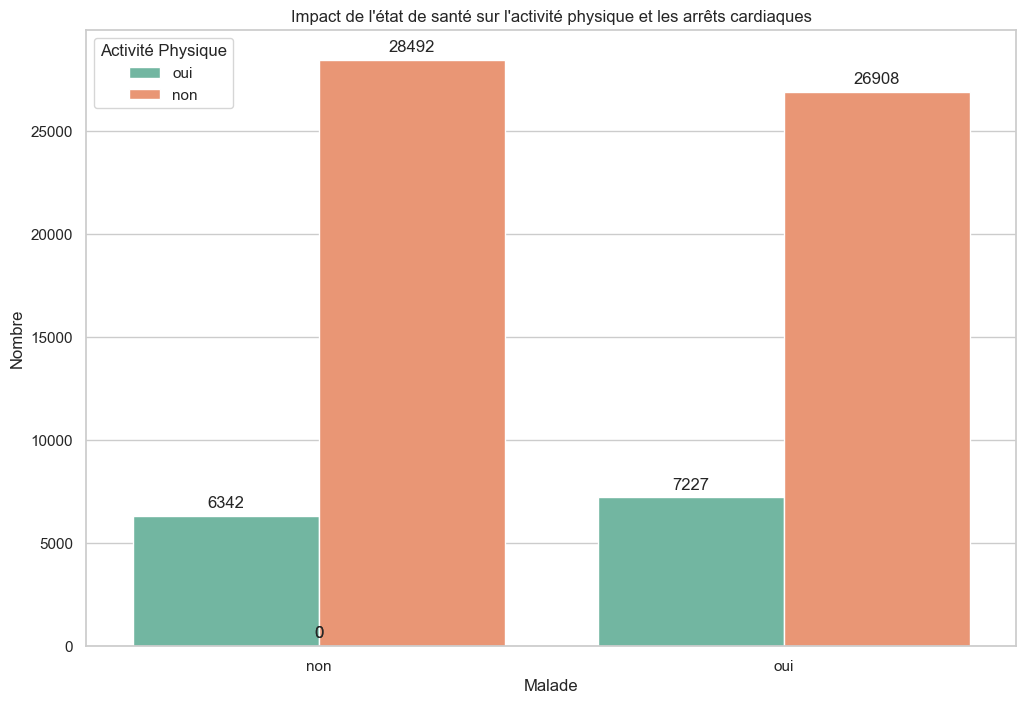

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Tracé du graphique principal (histogramme)
ax = sns.countplot(x='malade', hue='activite_physique', data=maladie, palette='Set2')

plt.title("Impact de l'état de santé sur l'activité physique et les arrêts cardiaques")
plt.xlabel("Malade")
plt.ylabel("Nombre")

# Obtenez les valeurs uniques de l'état de santé (malade ou non malade)
unique_malade = label_encoder_bin.inverse_transform(maladie['malade'].unique())

# Ajout des étiquettes de données
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Obtenez les étiquettes originales des données d'activité physique pour la légende
labels_activite_physique = label_encoder_bin.inverse_transform(maladie['activite_physique'].unique())

# Mettre à jour la légende avec les étiquettes originales des données d'activité physique
ax.legend(title='Activité Physique', labels=labels_activite_physique)

# Mettre à jour l'axe x avec les valeurs uniques de l'état de santé
ax.set_xticklabels(unique_malade)

plt.show()


C:\Users\himme\AppData\Local\Temp\ipykernel_17344\453050098.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



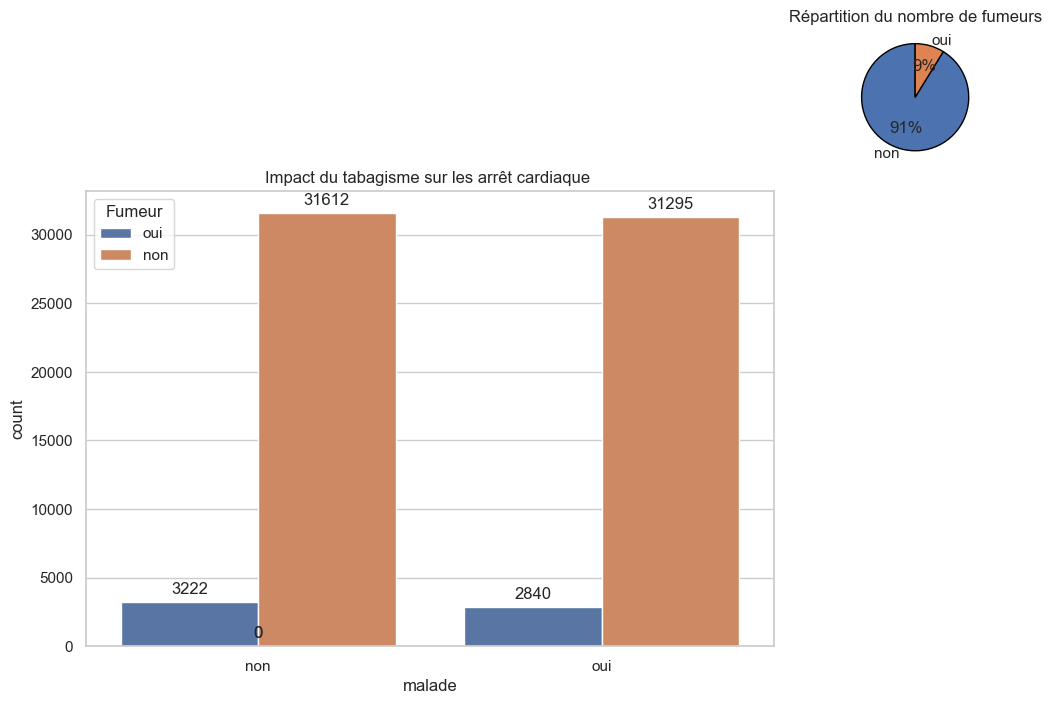

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
gs = plt.GridSpec(4, 4)

# Tracé du graphique principal (histogramme)
ax2 = plt.subplot(gs[1:, :-1])
sns.countplot(x='malade', hue='fumeur', data=maladie, ax=ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
ax2.set(title="Impact du tabagisme sur les arrêt cardiaque ")
ax2.set_xticklabels(label_encoder_bin.inverse_transform(maladie['malade'].unique()))

# Légende pour le graphique principal
ax2.legend(title='Fumeur', labels=label_encoder_bin.inverse_transform(maladie['malade'].unique()))

# Tracé du diagramme circulaire (en petit)
ax1 = plt.subplot(gs[0, -1])
ax1.pie(maladie['fumeur'].value_counts(), labels=label_encoder_bin.inverse_transform(maladie['malade'].unique()), autopct="%1.0f%%", startangle=90, wedgeprops={'edgecolor': 'black'})
ax1.set_title("Répartition du nombre de fumeurs")  # Titre pour le diagramme circulaire

plt.show()


In [ ]:
maladie.head()

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393  homme     168   62.0             110               80      normal   
1   20228  femme     156   85.0             140               90  tres eleve   
2   18857  femme     165   64.0             130               70  tres eleve   
3   17623  homme     169   82.0             150              100      normal   
4   17474  femme     156   56.0             100               60      normal   

    glycemie      fumeur conso_alco  activite_physique malade  Age(year)  \
id                                                                         
0          1  non fumeur        non                  1    non       50.0   
1          1  non fumeur        non                  1    oui       55.0   
2          1  non fumeur        non                  0    oui       52.0   
3          1  non fumeur        non                  1    oui       48.0   
4          1  non fumeur        non                  0    non       48.0   

          IMC  
id             
0   21.967120  
1   34.927679  
2   23.507805  
3   28.710479  
4   23.011177

In [ ]:
import plotly.express as px
import pandas as pd

dimensions = ["pression_systo", "pression_diasto", "cholesterol", "glycemie"]

fig = px.scatter_matrix(maladie, dimensions=dimensions, color="malade")
fig.update_layout(title='Matrice de dispersion des variables en fonction de la variable "malade"')
fig.show()


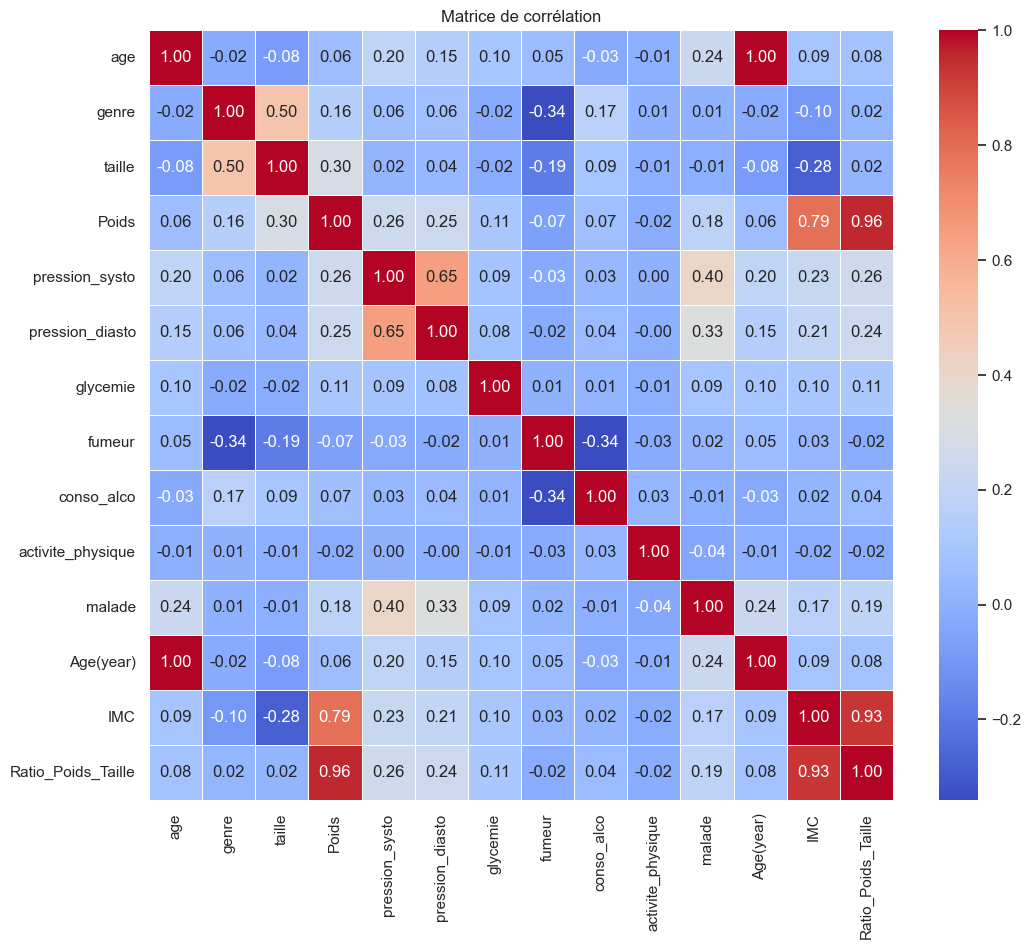

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = maladie.corr()

# Visualiser la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

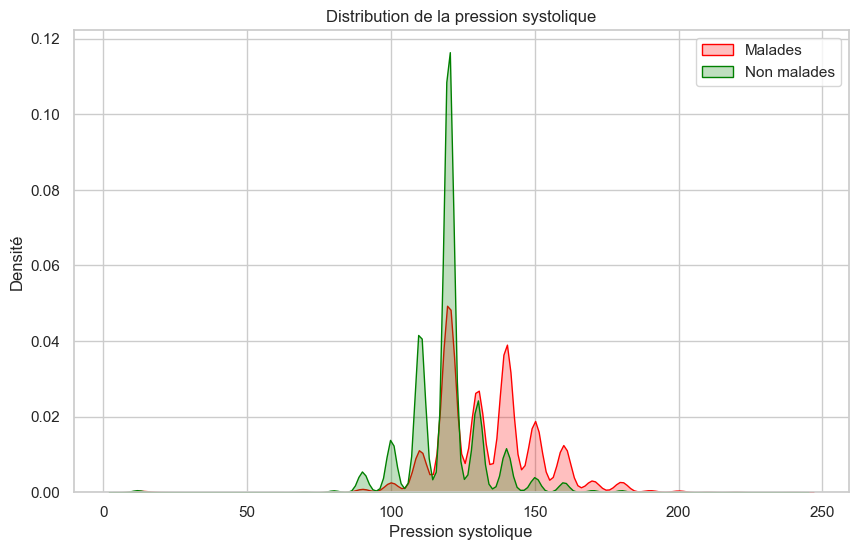

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer les données en personnes malades et non malades
malades = maladie[maladie['malade'] == 1]
non_malades = maladie[maladie['malade'] == 0]

# Création du graphique de densité
plt.figure(figsize=(10, 6))

# Courbe pour les personnes malades (en rouge)
sns.kdeplot(data=malades, x='pression_systo', color='red', label='Malades', fill=True)

# Courbe pour les personnes non malades (en vert)
sns.kdeplot(data=non_malades, x='pression_systo', color='green', label='Non malades', fill=True)

# Ajouter des titres et des légendes
plt.title('Distribution de la pression systolique')
plt.xlabel('Pression systolique')
plt.ylabel('Densité')
plt.legend()

plt.show()


# Modèle IA

KNN

In [ ]:
maladie.head()

age  genre  taille  Poids  pression_systo  pression_diasto cholesterol  \
id                                                                             
0   18393      1   168.0   62.0           110.0             80.0      normal   
1   20228      0   156.0   85.0           140.0             90.0  tres eleve   
2   18857      0   165.0   64.0           130.0             70.0  tres eleve   
3   17623      1   169.0   82.0           150.0            100.0      normal   
4   17474      0   156.0   56.0           100.0             60.0      normal   

    glycemie  fumeur  conso_alco  activite_physique  malade  Age(year)  \
id                                                                       
0          1       1           0                  1       0       50.0   
1          1       1           0                  1       1       55.0   
2          1       1           0                  0       1       52.0   
3          1       1           0                  1       1       48.0   
4          1       1           0                  0       0       48.0   

          IMC  genre_binaire IMC_Categorie Age_Categorie  Ratio_Poids_Taille  \
id                                                                             
0   21.967120              1        Normal         36-50           36.904762   
1   34.927679              0         Obèse         51-70           54.487179   
2   23.507805              0        Normal         51-70           38.787879   
3   28.710479              1      Surpoids         36-50           48.520710   
4   23.011177              0        Normal         36-50           35.897436   

   Pression_Arterielle_Categorie  
id                                
0                   Hypertension  
1                   Hypertension  
2                   Hypertension  
3                   Hypertension  
4                        Normale

In [ ]:
data_col = maladie[['Age(year)','taille','Poids','pression_systo','pression_diasto','glycemie','activite_physique','fumeur','conso_alco','malade','genre']]
data_col.head()

Age(year)  taille  Poids  pression_systo  pression_diasto  glycemie  \
id                                                                        
0        50.0   168.0   62.0           110.0             80.0         1   
1        55.0   156.0   85.0           140.0             90.0         1   
2        52.0   165.0   64.0           130.0             70.0         1   
3        48.0   169.0   82.0           150.0            100.0         1   
4        48.0   156.0   56.0           100.0             60.0         1   

    activite_physique  fumeur  conso_alco  malade  genre  
id                                                        
0                   1       1           0       0      1  
1                   1       1           0       1      0  
2                   0       1           0       1      0  
3                   1       1           0       1      1  
4                   0       1           0       0      0

In [ ]:
x = data_col.iloc[:, :-2]
y = data_col.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
import math
math.sqrt(len(y_test))

117.44786077234443

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 115, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=115)

In [ ]:
# Définir les valeurs de paramètres à rechercher
param_grid = {
    'n_neighbors': [60,80,120],  # ajustez cette plage selon vos besoins
    'p': [1, 2],  # Norme de distance (1 pour la distance de Manhattan, 2 pour la distance euclidienne)
}

# Créer un classifieur KNN
knn = KNeighborsClassifier()

# Effectuer une recherche par validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'n_neighbors': 120, 'p': 1}


In [ ]:
# Entraîner le modèle avec les meilleurs paramètres
best_knn = grid_search.best_estimator_
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=120, p=1)

In [ ]:
# Prédire les étiquettes de test
y_pred = best_knn.predict(x_test)

In [ ]:
# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle avec les meilleurs paramètres:", accuracy)

Précision du modèle avec les meilleurs paramètres: 0.7875888067275627


In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,y_pred)

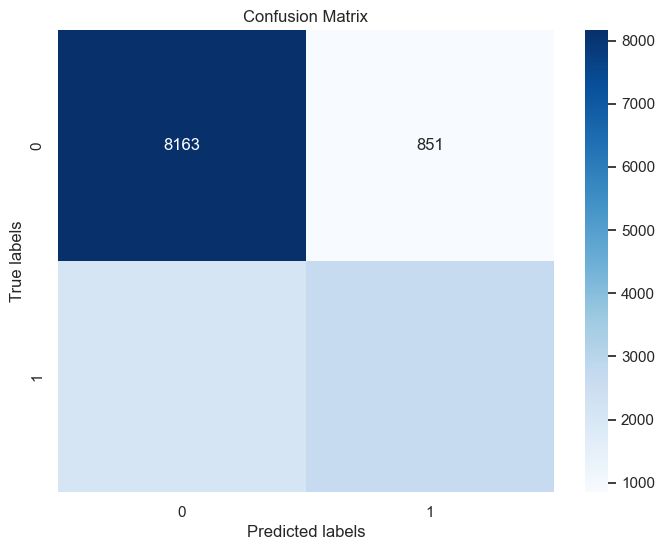

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7866463679860809
